In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as mpla

In [13]:
# Classic Runge-Kutta 4 method for integrating a system of four 1st order differential equations
def rungeKutta4(t0, tf, y1_0, y2_0, y3_0, y4_0, N, f1, f2, f3, f4):
  t = np.linspace(t0, tf, N+1)
  h = (tf - t0) / N
  y1 = np.zeros(N+1)
  y2 = np.zeros(N+1)
  y3 = np.zeros(N+1)
  y4 = np.zeros(N+1)

  y1[0]= y1_0
  y2[0]= y2_0
  y3[0]= y3_0
  y4[0]= y4_0
  for i in range(N):
    k11 = h * f1(t[i], y1[i], y2[i], y3[i], y4[i])
    k21 = h * f2(t[i], y1[i], y2[i], y3[i], y4[i])
    k31 = h * f3(t[i], y1[i], y2[i], y3[i], y4[i])
    k41 = h * f4(t[i], y1[i], y2[i], y3[i], y4[i])

    k12 = h * f1(t[i] + 0.5 * h, y1[i] + 0.5 * k11, y2[i] + 0.5 * k21, y3[i] + 0.5 * k31, y4[i] + 0.5 * k41)
    k22 = h * f2(t[i] + 0.5 * h, y1[i] + 0.5 * k11, y2[i] + 0.5 * k21, y3[i] + 0.5 * k31, y4[i] + 0.5 * k41)
    k32 = h * f3(t[i] + 0.5 * h, y1[i] + 0.5 * k11, y2[i] + 0.5 * k21, y3[i] + 0.5 * k31, y4[i] + 0.5 * k41)
    k42 = h * f4(t[i] + 0.5 * h, y1[i] + 0.5 * k11, y2[i] + 0.5 * k21, y3[i] + 0.5 * k31, y4[i] + 0.5 * k41)

    k13 = h * f1(t[i] + 0.5 * h, y1[i] + 0.5 * k12, y2[i] + 0.5 * k22, y3[i] + 0.5 * k32, y4[i] + 0.5 * k42)
    k23 = h * f2(t[i] + 0.5 * h, y1[i] + 0.5 * k12, y2[i] + 0.5 * k22, y3[i] + 0.5 * k32, y4[i] + 0.5 * k42)
    k33 = h * f3(t[i] + 0.5 * h, y1[i] + 0.5 * k12, y2[i] + 0.5 * k22, y3[i] + 0.5 * k32, y4[i] + 0.5 * k42)
    k43 = h * f4(t[i] + 0.5 * h, y1[i] + 0.5 * k12, y2[i] + 0.5 * k22, y3[i] + 0.5 * k32, y4[i] + 0.5 * k42)

    k14 = h * f1(t[i] + h, y1[i] + k13, y2[i] + k23, y3[i] + k33, y4[i] + k43)
    k24 = h * f2(t[i] + h, y1[i] + k13, y2[i] + k23, y3[i] + k33, y4[i] + k43)
    k34 = h * f3(t[i] + h, y1[i] + k13, y2[i] + k23, y3[i] + k33, y4[i] + k43)
    k44 = h * f4(t[i] + h, y1[i] + k13, y2[i] + k23, y3[i] + k33, y4[i] + k43)

    y1[i+1] = y1[i] + (k11 + 2 * k12 + 2 * k13 + k14) / 6
    y2[i+1] = y2[i] + (k21 + 2 * k22 + 2 * k23 + k24) / 6
    y3[i+1] = y3[i] + (k31 + 2 * k32 + 2 * k33 + k34) / 6
    y4[i+1] = y4[i] + (k41 + 2 * k42 + 2 * k43 + k44) / 6
  return t, y1, y2, y3, y4

In [35]:
t0 = 0
tf = 10
theta1_0 = 3
omega1_0 = 0
theta2_0 = 2.5
omega2_0 = 0
l1 = 1
l2 = 1
m1 = 1
m2 = 1
g = 9.8

def angVel1(t, theta1, theta2, omega1, omega2): return omega1
def angVel2(t, theta1, theta2, omega1, omega2): return omega2
def angAcc1(t, theta1, theta2, omega1, omega2):
  numerator = -g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) - 2 * np.sin(theta1 - theta2) * m2 * (omega2 * omega2 * l2 + omega1 * omega1 * l1 * np.cos(theta1 - theta2))
  denominator = l1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2))
  return numerator / denominator
def angAcc2(t, theta1, theta2, omega1, omega2):
  numerator = 2 * np.sin(theta1 - theta2) * (omega1 * omega1 * l1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) + omega2 * omega2 * l2 * m2 * np.cos(theta1 - theta2))
  denominator = l2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2))
  return numerator / denominator

N = 500
t, theta1, theta2, omega1, omega2 = rungeKutta4(t0, tf, theta1_0, theta2_0, omega1_0, omega2_0, N, angVel1, angVel2, angAcc1, angAcc2)

x1 = l1 * np.sin(theta1)
y1 = -l1 * np.cos(theta1)
x2 = x1 + l2 * np.sin(theta2)
y2 = y1 - l2 * np.cos(theta2)

In [36]:
# RENDERING AND SAVING OF ANIMATION CAN TAKE SOME TIME
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set(xlim=(-2.2,2.2), ylim=(-2.2,2.2))
string1, = ax.plot([0, x1[0]], [0, y1[0]], color='grey')
string2, = ax.plot([x1[0], x2[0]], [y1[0], y2[0]], color='grey')
trail1, = ax.plot(x1[0], y1[0], color='blue')
trail2, = ax.plot(x2[0], y2[0], color='red')
mass1, = ax.plot(x1[0], y1[0], color='black', marker='o')
mass2, = ax.plot(x2[0], y2[0], color='black', marker='o')

def animate(i):
  string1.set_data([0, x1[i]], [0, y1[i]])
  string2.set_data([x1[i], x2[i]], [y1[i], y2[i]])
  trail1.set_data(x1[:i+1], y1[:i+1])
  trail2.set_data(x2[:i+1], y2[:i+1])
  mass1.set_data([x1[i]], [y1[i]])
  mass2.set_data([x2[i]], [y2[i]])

anim = mpla.FuncAnimation(fig, animate, frames=N+1)
wr = mpla.FFMpegWriter(fps=30)
anim.save('animation.gif', writer=wr)
plt.close()

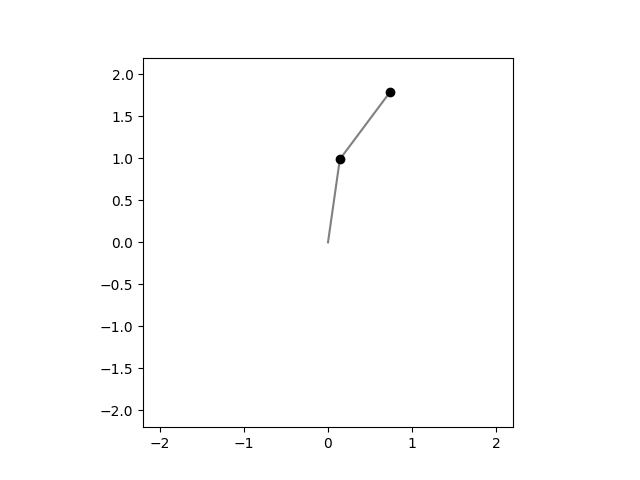

In [37]:
from IPython.display import Image
Image('animation.gif')

In [46]:
# RENDERING AND SAVING OF ANIMATION CAN TAKE SOME TIME
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set(xlim=(-10,10), ylim=(-10,10))
mass1, = ax.plot(theta1[0], omega1[0], color='blue')
mass2, = ax.plot(theta2[0], omega2[0], color='red')

def animate(i):
  mass1.set_data([theta1[:i+1]], [omega1[:i+1]])
  mass2.set_data([theta2[:i+1]], [omega2[:i+1]])

anim = mpla.FuncAnimation(fig, animate, frames=N+1)
wr = mpla.FFMpegWriter(fps=30)
anim.save('phase_space1.gif', writer=wr)
plt.close()

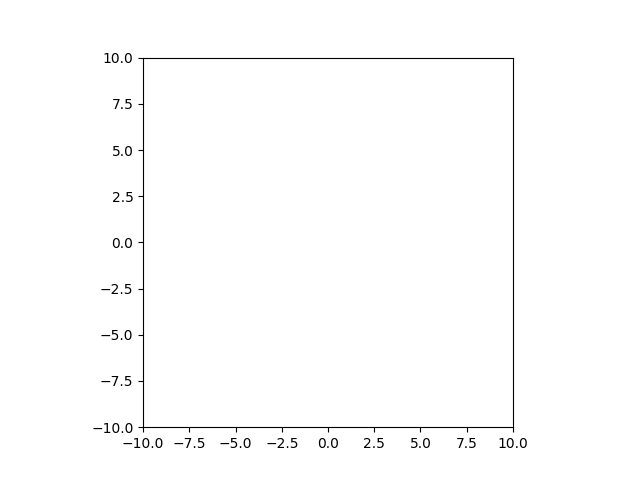

In [47]:
Image('phase_space1.gif')

In [52]:
# RENDERING AND SAVING OF ANIMATION CAN TAKE SOME TIME
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set(xlim=(-10,10), ylim=(-10,10))
tututu, = ax.plot(theta1[0], theta2[0], color='blue')

def animate(i):
  tututu.set_data([theta1[:i+1]], [theta2[:i+1]])

anim = mpla.FuncAnimation(fig, animate, frames=N+1)
wr = mpla.FFMpegWriter(fps=30)
anim.save('phase_space2.gif', writer=wr)
plt.close()

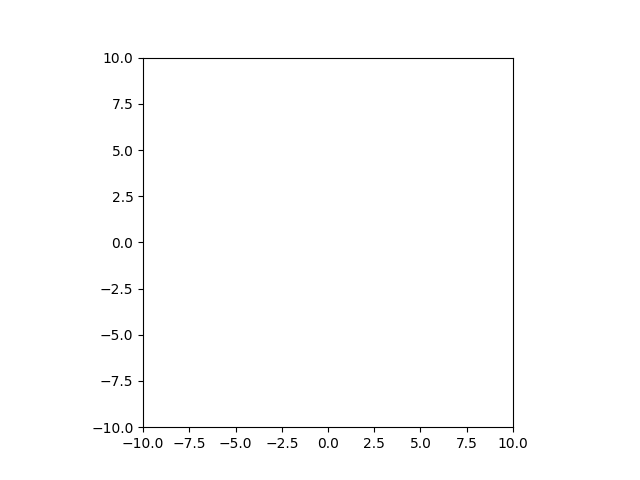

In [53]:
Image('phase_space2.gif')